<a id="table"></a>
1.  [Importing requirements](#importing)
2.  [Building the shaped Word Cloud](#building)
3.  [Creating the shaped Word Cloud](#creating)

<a id="importing"></a>
 [back to top](#table)

# 1. Importing requirements

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import docx

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
 
%matplotlib inline

<a id="building"></a>
 [back to top](#table)

# 2. Building the Shaped Word Cloud

## 2.1.  Reading the word document of docx format 

In [2]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [3]:
cvdoc = getText('data/CVdoc.docx')

## 2.2.  Preparing the mask for the shape

In [4]:
career_mask = np.array(Image.open("image/career2_mask.png"))
career_mask

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [5]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [6]:
transformed_career_mask = np.ndarray((career_mask.shape[0],career_mask.shape[1]), np.int32)

for i in range(len(career_mask)):
    transformed_career_mask[i] = list(map(transform_format, career_mask[i]))
transformed_career_mask

array([[255, 255, 255, ...,   1,   1,   1],
       [255, 255, 255, ...,   1,   1,   1],
       [255, 255, 255, ...,   1,   1,   1],
       ...,
       [255, 255, 255, ...,   1,   1,   1],
       [255, 255, 255, ...,   1,   1,   1],
       [255, 255, 255, ...,   1,   1,   1]])

<a id="creating"></a>
[back to top](#table)
# 3. Creating the shaped word cloud 

In [7]:
stopwords = set(STOPWORDS)
stopwords.update(["Paysend", "Qikserve", "July","assistant","accountant","role","Scotland"])

## 3.1. Generating a shaped word cloud with default colour settings 

In [8]:
wc = WordCloud(background_color="white", max_words=700,
               min_font_size=10, mask=transformed_career_mask,
               stopwords=stopwords, contour_width=3, contour_color='teal'
              )

In [9]:
wc.generate(cvdoc)

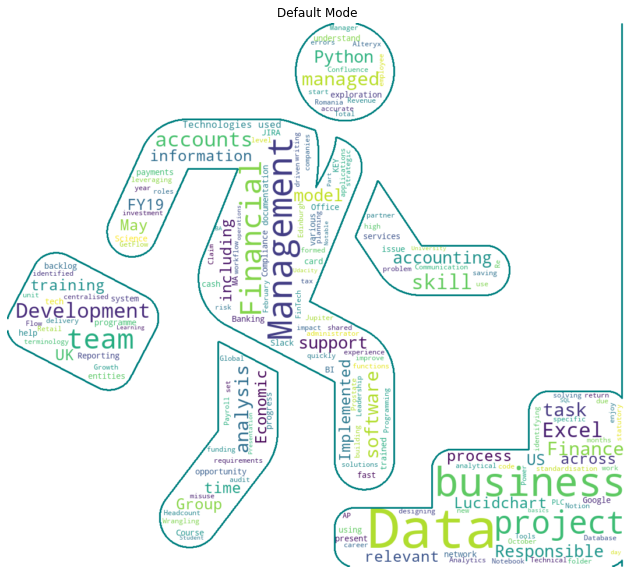

In [10]:
plt.figure(figsize=[20,10])
plt.title("Default Mode")
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

## 3.2.  Generating a shaped word cloud with bespoke color settings 

In [11]:
wc = WordCloud(background_color="black", max_words=700,
               min_font_size=10, mask=transformed_career_mask,
               stopwords=stopwords, contour_width=3, contour_color='pink'
              )

In [12]:
wc.generate(cvdoc)

In [13]:
def grey_color_func(word, font_size, position, 
                    orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

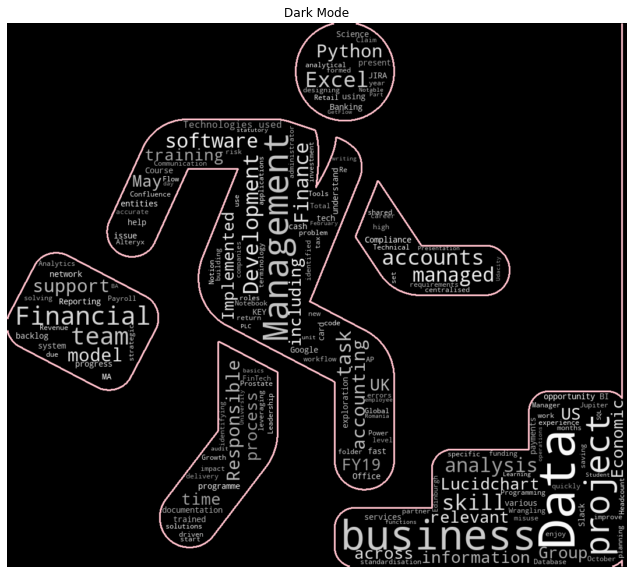

In [14]:
plt.figure(figsize=[20,10])
plt.title("Dark Mode")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()